In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import datasets

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
df = pd.read_csv('Enumerated dataset.csv')
df.head()

,Age,Education level,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Secure of person's digital devices,Legitimacy of a website,Password with personal information,Aware of the danger of clicking pop-up screens,Attention to person's account privacy,Protection of social media services for personal info,...,blogs1,etc.1,Government websites (e.g. CERT)1,I do not feel that I keep myself updated1,Rely on automatic updates1,Internet service provider ISPs1,Other- Messages from Communication Company1,Others: Twitter1,Other- Twitter1,etc..1
0,0,3,2,1,3,4,0,4,4,2,...,1,1,0,0,0,0,0,0,0,0
1,0,2,2,1,4,0,4,4,4,3,...,1,1,0,0,0,0,0,0,0,0
2,0,2,2,1,4,3,3,4,4,3,...,1,1,0,0,0,0,0,0,0,0
3,0,2,2,1,4,2,0,3,1,3,...,1,1,0,0,0,0,0,0,0,0
4,0,2,2,1,4,3,1,4,3,2,...,1,1,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1213, 224)

In [4]:
# Checking the correlation for the data of our target ( Victim of cybercrime )
#The dataset contain too many columns, correlation map will not be useful
df.corrwith(df["Victim of cybercrime"]).sort_values( ascending=False)

Victim of cybercrime                                                                                 1.000000
Bank                                                                                                 0.145149
Online personal information is not secure enough                                                     0.135610
No one                                                                                               0.109586
Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime    0.105763
                                                                                                       ...   
I don't know.1                                                                                      -0.086462
Don’t know but will ask my friends for advice                                                       -0.106505
Well protected against cybercrime                                                                   -0.106858
Laws are e

In [5]:
# Finding the best features to use for the traning and store it
corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)
# pick the best 10 columns. 5 from the top and 5 from the last
first5=corrArray[1:11]
first5= list(first5.index)
first5

['Bank',
 'Online personal information is not secure enough',
 'No one',
 'Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime',
 'Education level',
 'Role of the government in combating cybercrimes_No role',
 'Apple store',
 'Education',
 'Government or professional reports',
 'PIN)']

In [6]:
# Finding the best features to use for the traning and store it
corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)
# pick the best 20 columns. 10 from the top and 10 from the last
last5=corrArray[-10:]
last5= list(last5.index)
last5

['Legitimacy of a website',
 'Role of the government in combating cybercrimes_Have stricter laws and punishments for cyber crimes',
 'Concerned about encountering material promotes hatred or religious extremism',
 'Concerned about receiving phishing emails',
 'I do not feel that I keep myself updated',
 "I don't know.1",
 'Don’t know but will ask my friends for advice',
 'Well protected against cybercrime',
 'Laws are effective in managing the cybercrime problem',
 'Report cybercrime']

## PCA

In [7]:
# Selecting features
# Save X data
X = df[first5 + last5]

# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['Victim of cybercrime'])

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [9]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [10]:
# components
pca.components_

array([[ 9.35010246e-04,  6.57006753e-02,  5.11011496e-04,
        -6.11542016e-03,  7.46754662e-02,  5.22695096e-03,
         4.30790650e-03,  7.17949904e-02,  2.51238815e-02,
         5.59258609e-02, -2.98836162e-01, -7.04717257e-02,
         3.80984964e-02,  8.19206893e-02,  3.00978329e-02,
         3.35415142e-03,  4.20552203e-02, -7.13128729e-01,
        -6.03067056e-01, -6.12299910e-02],
       [ 1.50866245e-03, -7.19374115e-01, -1.29222558e-04,
        -3.80082626e-01, -4.93201590e-02,  6.90054907e-04,
        -3.22962459e-03, -6.86220367e-02, -8.28068455e-02,
        -3.07299493e-02, -2.92590929e-01, -1.25777876e-02,
         2.73161303e-01,  2.65749495e-01,  8.22564983e-02,
         4.75778690e-02,  3.02041907e-02,  2.30366648e-01,
        -1.65416279e-01,  4.12450513e-02],
       [-2.82916391e-03, -3.78728143e-01, -7.40280090e-04,
         2.18216602e-01,  1.14373085e-01,  1.55132242e-02,
         4.48067253e-03,  9.01886237e-02,  1.54585541e-01,
         9.77882525e-02,  5.5

In [11]:
pd.Series(pca.explained_variance_ratio_) 

0     0.191901
1     0.172050
2     0.103858
3     0.086352
4     0.081011
5     0.068874
6     0.049265
7     0.042651
8     0.036432
9     0.030943
10    0.029719
11    0.027468
12    0.021128
13    0.020460
14    0.015137
15    0.015005
16    0.006363
17    0.000628
18    0.000383
19    0.000373
dtype: float64

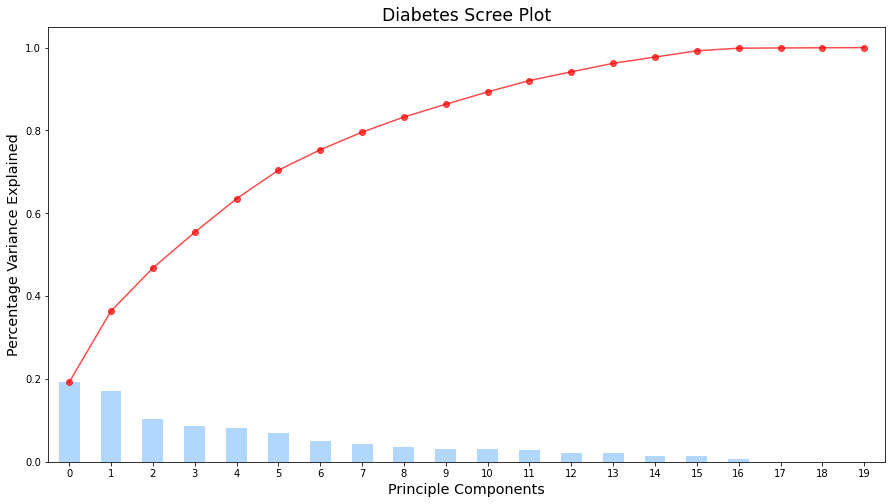

In [12]:
plt.style.use("seaborn-pastel")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [13]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [14]:
# Fit PCA
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=1230) # Set max_iter so model reaches convergence

logreg = LogisticRegression()

In [15]:
# Measure how long it takes to train WITHOUT PCA

print('Measure how long it takes to train WITHOUT PCA')
%timeit logreg_noPCA.fit(X_train, y_train)

print()

# Measure how long it takes to train with PCA

print('Measure how long it takes to train WITH PCA')
%timeit logreg.fit(X_train_pca, y_train)

Measure how long it takes to train WITHOUT PCA
18.7 ms ± 942 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Measure how long it takes to train WITH PCA
4.33 ms ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
# PCA Model
print('PCA Training accuracy:',logreg.score(X_train_pca, y_train)) 
print('PCA Testing accuracy:', logreg.score(X_test_pca, y_test))

PCA Training accuracy: 0.9237113402061856
PCA Testing accuracy: 0.9053497942386831


## KMeans

In [107]:
df1 = df[['Report cybercrime', 'Victim of cybercrime', 'Bank']]

In [108]:
X = df.iloc[:,[0,1]].values
X

array([[0, 3],
       [0, 2],
       [0, 2],
       ...,
       [0, 2],
       [0, 2],
       [0, 2]])

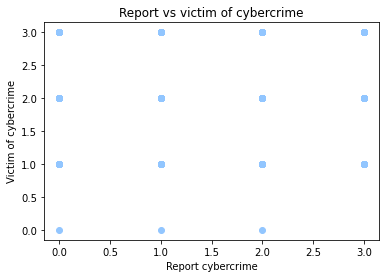

In [110]:
# Initial EDA to determine possible number of clusters in our data "customer groups"

plt.scatter(X[:,0], X[:,1])

plt.xlabel('Report cybercrime')
plt.ylabel('Victim of cybercrime')
plt.title('Report vs victim of cybercrime')
plt.show()

### Elbow Graph

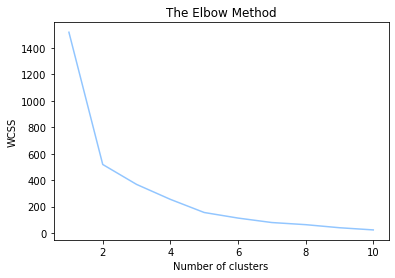

In [92]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 5 
# Note: This is also based on your judgment and your understanding of the dataset 

In [93]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X)

In [94]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [111]:
# This prints the Report cybercrime in the 1st cluster --> cluster 0
print (X[y_kmeans == 0, 0])

print('\n')

# This prints the sVictim of cybercrime in the 1st cluster --> cluster 0
print (X[y_kmeans == 0, 1])

[2 2 2 2 2 2 3 2 3 2 3 3 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 2 2 2 2 2 2 3 3 3 2 2 3 2 2 3 2 2 2 2 2 3 2 2 3 2 3 3 2 3 2 2 2 2 2 3 2
 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 3 3 3 2 3 3 2 3 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 3
 2 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1
 2 2 2 2 1 2 1 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 2 2 2 2 2 1 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

In [96]:
# Cluster centeriods

print (kmeans.cluster_centers_)

[[2.14885496e+00 1.88167939e+00]
 [6.66133815e-16 2.04395604e+00]
 [1.00000000e+00 2.31736527e+00]
 [2.17391304e+00 3.00000000e+00]
 [1.46341463e-01 9.83739837e-01]]


In [97]:
# The Report cybercrime for the centriods
print (kmeans.cluster_centers_[:, 0])

# The Victim of cybercrime for the centriods
print (kmeans.cluster_centers_[:, 1])

[2.14885496e+00 6.66133815e-16 1.00000000e+00 2.17391304e+00
 1.46341463e-01]
[1.88167939 2.04395604 2.31736527 3.         0.98373984]


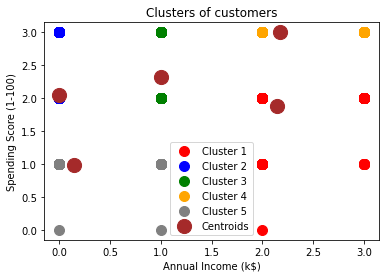

In [98]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')

#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [99]:
#print (np.where(y_kmeans ==0 )[0])

[   7   12   13   16   21   22   25   27   28   31   33   34   38   40
   43   49   50   51   53   55   62   64   66   68   70   72   76   89
   95   97   98   99  102  109  110  113  116  119  138  139  140  141
  142  149  158  165  167  171  176  181  190  192  195  196  203  223
  224  225  235  237  238  244  247  255  258  259  263  264  267  280
  281  283  285  286  288  290  291  294  303  305  307  309  311  315
  319  321  324  331  335  336  341  346  350  353  363  364  369  370
  373  380  382  386  387  388  392  393  396  397  401  402  407  408
  410  412  414  417  419  421  422  424  426  438  439  443  444  447
  458  459  460  464  500  501  503  504  506  516  517  523  524  526
  527  529  533  537  539  551  554  556  557  563  564  565  569  571
  573  575  576  579  583  589  591  593  603  606  608  615  616  620
  622  627  628  630  633  634  653  654  655  667  670  672  675  676
  677  679  680  684  688  692  693  735  739  755  760  761  768  779
  780 